In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import scipy.io as sio

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.age(1)

import seaborn as sns
import pandas as pd
from astropy.io import fits

sns.set(font_scale=2)
sns.set_style("whitegrid")

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

# Step 1: import catalogs and galaxy IDs [and flags]

In [2]:
warnings.filterwarnings('ignore')

candels_cat_z1 = np.loadtxt('catalogs/CANDELS_GDSS_workshop_z1.dat')

# subtracting 1 from the ID for python indexing
cat_z1_ids = candels_cat_z1[0:,0] - 1
cat_z1_z = candels_cat_z1[0:,1]

print(str(cat_z1_z.shape[0])+' galaxies in the z~1 catalog.')

ircat = np.genfromtxt('catalogs/CANDELS_GDSS_workshop_z1_fluxes_Jy_UVtoIR.dat')
print(ircat.shape)

# ID      zz                   1
# CTIO_U             eCTIO_U    3        
# VIMOS_U            eVIMOS_U    5       
# ACS_F435W          eACS_F435W   7      
# ACS_F606W          eACS_F606W    9     
# ACS_F775W          eACS_F775W     11    
# ACS_F814W          eACS_F814W      13   
# ACS_F850LP         eACS_F850LP       15 
# WFC3_F098M   eWFC3_F098M   17
# WFC3_F105W         eWFC3_F105W 19       
# WFC3_F125W         eWFC3_F125W   21     
# WFC3_F160W         eWFC3_F160W     23   
# ISAAC_KS           eISAAC_KS         25 
# HAWKI_KS           eHAWKI_KS          27
# IRAC_CH1           eIRAC_CH1          29
# IRAC_CH2           eIRAC_CH2          31
# IRAC_CH3           eIRAC_CH3          33
# IRAC_CH4           eIRAC_CH4          35
# f24            ef24           37
# f70            ef70           39
# f100           ef100          41
# f160           ef160          43
# f250           ef250          45
# flg1   flg2  47


371 galaxies in the z~1 catalog.
(371, 48)


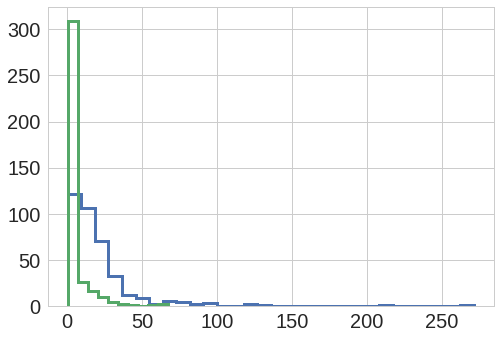

In [3]:
f435_snr = ircat[0:,6]/ircat[0:,7]
f24_snr = ircat[0:,36]/ircat[0:,37]
f100_snr = ircat[0:,40]/ircat[0:,41]
plt.hist(f435_snr,30,histtype='step',lw=3)
plt.hist(f24_snr,10,histtype='step',lw=3)
# plt.hist(f100_snr,50,histtype='step',lw=3)
plt.show()

In [4]:
thrs = 3
print(np.sum((f24_snr>thrs) & (f100_snr>thrs)))
print(np.sum((f24_snr>thrs)))
print(np.sum(f24_snr>0))

63
107
371


# Step 2: import outputs of all the SED fitting codes.

In [5]:
%run import_scripts/import_IR_fits.py

# OLDER CIGALE FILES, run these if you want to import z~1 cigale files from before March 4, 2019.
#%run import_scripts/import_IR_fits_oldCigale.py

importing CIGALE files from Mar 4, 2019


# Step 3: Take everyone's data and put it in a dataframe, then start the visualization and analysis.

## define dataframes below for Mass, SFR and dust at z~1. Change the dictionary labels here to change the x-tick labels in the violin- and box-plots.

## change 24 micron SNR threshold by changing [thrs], default = 3

In [6]:
thrs = 3
#mask = (f24_snr>thrs) & (f100_snr>thrs)
mask = (f24_snr>thrs) 

# 'MAGPHYS (no IR, w/AGN)': magphys_mass_z1_wagn[mask],


z1_cat_mass_dict = {'Prospector (no IR, no AGN)':prospector_mass_z1[mask], 
                    'Prospector (w/IR, no AGN)':prospector_mass_z1_IR[mask],
                    'Prospector (w/IR, w/AGN)':prospector_mass_z1_IR_AGN[mask],
                    'MAGPHYS (no IR, no AGN)': magphys_mass_z1[mask],
                    'MAGPHYS (no IR, w/ AGN)': magphys_mass_z1_wagn[mask],
                    'MAGPHYS (w/IR, no AGN)': magphys_ir_mass[mask],
                    'MAGPHYS (w/IR], w/AGN)': magphys_ir_mass_AGN[mask],
                    'AGNFitter': agnfitter_mass[mask],
                    'BAGPIPES (no IR)':bagpipes_mass_z1[mask],
                    'BAGPIPES (w/IR)':bagpipes_IR_mass[mask],
                    'CIGALE (no IR, no AGN)': cigale_mass[mask],
                    'CIGALE (w/IR, no AGN)': cigale_ir_mass[mask],
                    'CIGALE (w/IR, w/AGN)': cigale_ir_agn_mass[mask],
                    'SED3FIT (no IR)':sed3fit_mass[mask],
                    'SED3FIT (w/IR)':sed3fit_ir_mass[mask]
                   }
z1_cat_mass = pd.DataFrame(data=z1_cat_mass_dict)

z1_cat_mass[z1_cat_mass < 7] = np.nan

# 'MAGPHYS (no IR, w/AGN)': magphys_sfr_z1_wagn[mask],


z1_cat_sfr_dict = {'Prospector (no IR, no AGN)':prospector_sfr_z1[mask], 
                    'Prospector (w/IR, no AGN)':prospector_sfr_z1_IR[mask],
                    'Prospector (w/IR, w/AGN)':prospector_sfr_z1_IR_AGN[mask],
                    'MAGPHYS (no IR, no AGN)': magphys_sfr_z1[mask],
                    'MAGPHYS (no IR, w/ AGN)': magphys_sfr_z1_wagn[mask],
                    'MAGPHYS (w/IR, no AGN)': magphys_ir_sfr[mask],
                    'MAGPHYS (w/IR, w/AGN)': magphys_ir_sfr_AGN[mask],
                    'AGNFitter': agnfitter_sfr[mask],
                    'BAGPIPES (no IR)':bagpipes_sfr_z1[mask],
                    'BAGPIPES (w/IR)':bagpipes_IR_sfr[mask],
                    'CIGALE (no IR, no AGN)': cigale_sfr[mask],
                    'CIGALE (w/IR, no AGN)': cigale_ir_sfr[mask],
                    'CIGALE (w/IR, w/AGN)': cigale_ir_agn_sfr[mask],
                    'SED3FIT (no IR)':sed3fit_sfr[mask],
                    'SED3FIT (w/IR)':sed3fit_ir_sfr[mask]
                   }
z1_cat_sfr = pd.DataFrame(data=z1_cat_sfr_dict)

z1_cat_sfr[z1_cat_sfr < -3] = np.nan

# 'MAGPHYS (no IR, w/AGN)': magphys_Av_z1_wagn[mask],


z1_cat_av_dict = {'Prospector (no IR, no AGN)':prospector_Av_z1[mask], 
                    'Prospector (w/IR, no AGN)':prospector_Av_z1_IR[mask],
                    'Prospector (w/IR, w/AGN)':prospector_Av_z1_IR_AGN[mask],
                    'MAGPHYS (no IR, no AGN)': magphys_Av_z1[mask],
                    'MAGPHYS (no IR, w/ AGN)': magphys_Av_z1_wagn[mask],
                    'MAGPHYS (w/IR, no AGN)': magphys_ir_av[mask],
                    'MAGPHYS (w/IR, w/AGN)': magphys_ir_av_AGN[mask],
                    'AGNFitter': agnfitter_av[mask],
                    'BAGPIPES (no IR)':bagpipes_Av_z1[mask],
                    'BAGPIPES (w/IR)':bagpipes_IR_av[mask],
                    'CIGALE (no IR, no AGN)': cigale_Av[mask],
                    'CIGALE (w/IR, no AGN)': cigale_ir_Av[mask],
                    'CIGALE (w/IR, w/AGN)': cigale_ir_agn_Av[mask],
                    'SED3FIT (no IR)':sed3fit_av[mask],
                    'SED3FIT (w/IR)':sed3fit_ir_av[mask]
                   }
z1_cat_av = pd.DataFrame(data=z1_cat_av_dict)

z1_cat_av[z1_cat_av < 0] = np.nan





# make (and save) plots: 

# z=1 | M$_*$, SFR, A$_V$ distribution for fits with FIR data [violin plots]

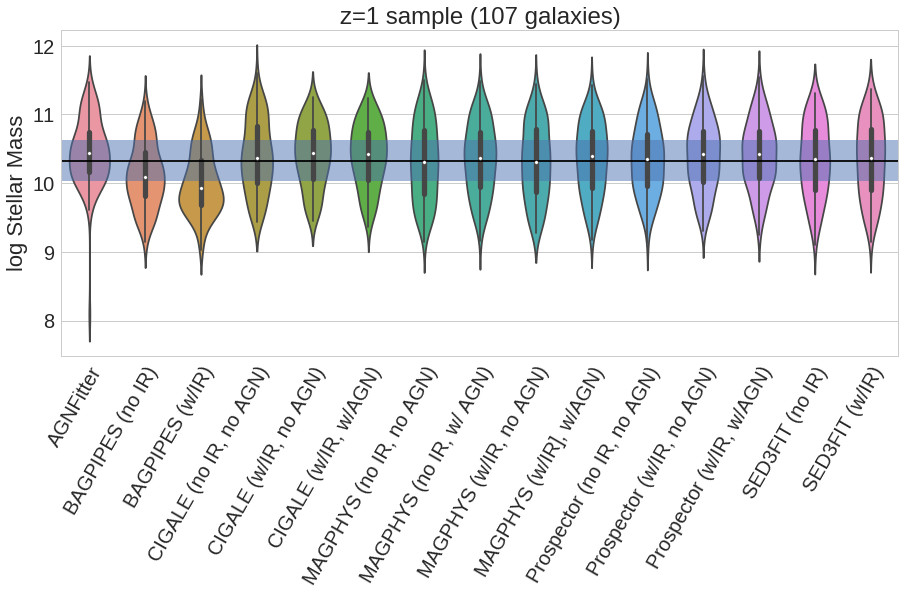

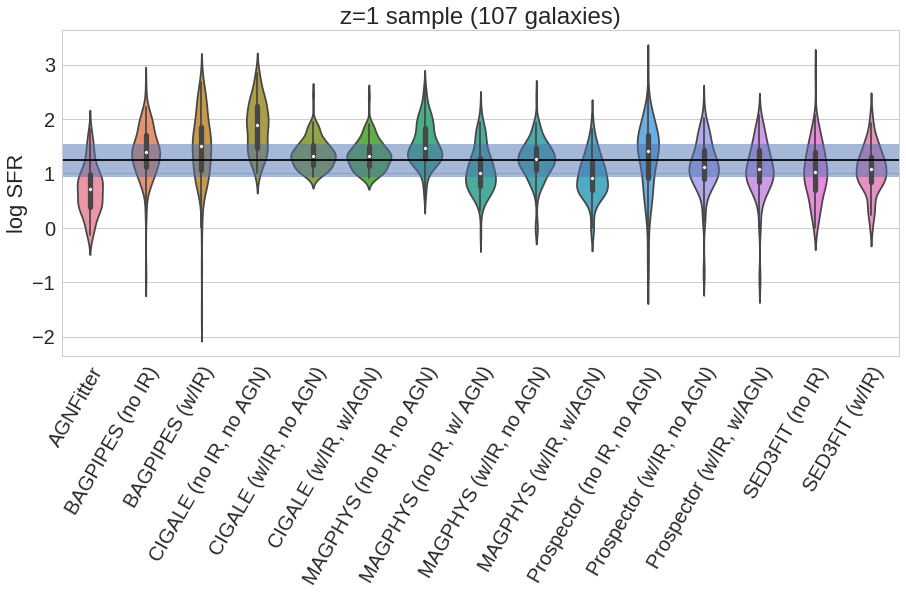

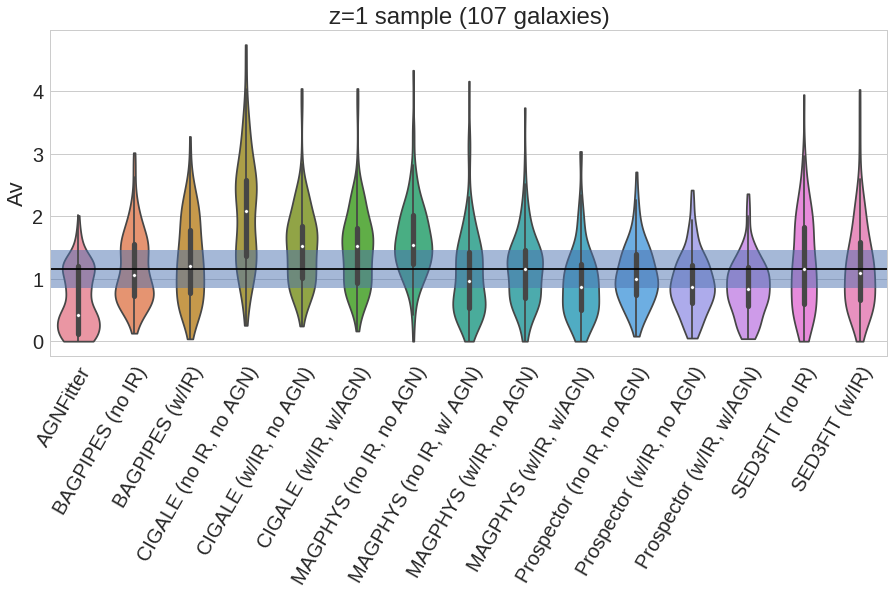

In [7]:
sns.set_style('whitegrid')

plt.figure(figsize=(15,6))
ax = sns.violinplot(data=z1_cat_mass, orient='v',zorder=10)


median_mass_val = np.nanmedian(z1_cat_mass)
plt.plot([-20,20],[median_mass_val,median_mass_val],'k-')
plt.fill_between([-20,20], [median_mass_val+0.3,median_mass_val+0.3], [median_mass_val-0.3,median_mass_val-0.3], alpha=0.5)
ax.set_xticks(np.arange(z1_cat_mass.shape[1])+0.3)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right',position=(1,0))
ax.set_ylabel('log Stellar Mass')
ax.set_title('z=1 sample ('+str(z1_cat_mass.shape[0])+' galaxies)')

plt.savefig('z1_IR_comparison_Mstar'+str(z1_cat_mass.shape[0])+'png',bbox_inches='tight')
plt.show()


plt.figure(figsize=(15,6))
ax = sns.violinplot(data=z1_cat_sfr, orient='v',zorder=10)


median_sfr_val = np.nanmedian(z1_cat_sfr)
plt.plot([-20,20],[median_sfr_val,median_sfr_val],'k-')
plt.fill_between([-20,20], [median_sfr_val+0.3,median_sfr_val+0.3], [median_sfr_val-0.3,median_sfr_val-0.3], alpha=0.5)
ax.set_xticks(np.arange(z1_cat_sfr.shape[1])+0.3)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right',position=(1,0))
ax.set_ylabel('log SFR')
ax.set_title('z=1 sample ('+str(z1_cat_mass.shape[0])+' galaxies)')

plt.savefig('z1_IR_comparison_SFR'+str(z1_cat_mass.shape[0])+'.png',bbox_inches='tight')
plt.show()

sns.set_style('whitegrid')

plt.figure(figsize=(15,6))
ax = sns.violinplot(data=z1_cat_av, orient='v',zorder=10,cut=0)


median_Av_val = np.nanmedian(z1_cat_av)
plt.plot([-20,20],[median_Av_val,median_Av_val],'k-')
plt.fill_between([-20,20], [median_Av_val+0.3,median_Av_val+0.3], [median_Av_val-0.3,median_Av_val-0.3], alpha=0.5)
ax.set_xticks(np.arange(z1_cat_av.shape[1])+0.3)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right',position=(1,0))
ax.set_ylabel('Av')
ax.set_title('z=1 sample ('+str(z1_cat_mass.shape[0])+' galaxies)')

plt.savefig('z1_IR_comparison_Av'+str(z1_cat_mass.shape[0])+'.png',bbox_inches='tight')
plt.show()

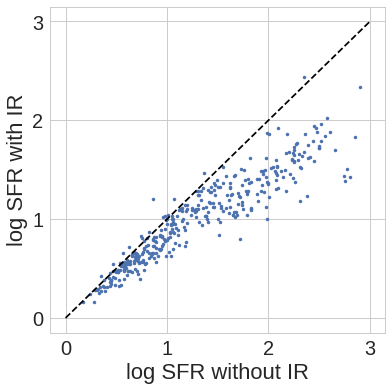

In [8]:
plt.figure(figsize=(6,6))
plt.plot(cigale_sfr, cigale_ir_sfr,'.')
plt.plot([0,3],[0,3],'k--')
plt.yticks(np.arange(4))
plt.xlabel('log SFR without IR')
plt.ylabel('log SFR with IR')
plt.show()

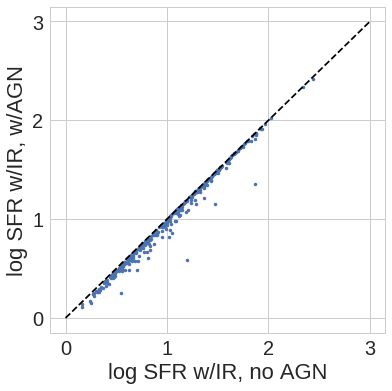

In [9]:
plt.figure(figsize=(6,6))
plt.plot(cigale_ir_sfr, cigale_ir_agn_sfr,'.')
plt.plot([0,3],[0,3],'k--')
plt.yticks(np.arange(4))
plt.xlabel('log SFR w/IR, no AGN')
plt.ylabel('log SFR w/IR, w/AGN')
plt.show()

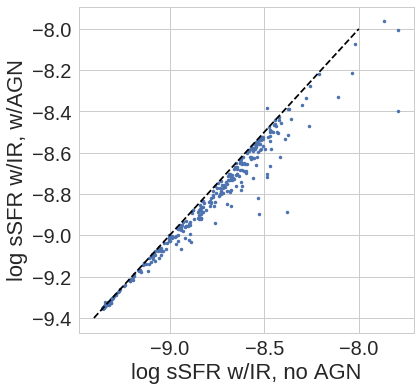

In [10]:
plt.figure(figsize=(6,6))
plt.plot(np.log10(10**cigale_ir_sfr/10**cigale_ir_mass), np.log10(10**cigale_ir_agn_sfr/10**cigale_ir_agn_mass),'.')
#plt.plot([0,3],[0,3],'k--')
#plt.yticks(np.arange(4))
plt.plot([-9.4,-8],[-9.4,-8],'k--')
plt.xlabel('log sSFR w/IR, no AGN')
plt.ylabel('log sSFR w/IR, w/AGN')
plt.show()